## 합성곱 신경망 
- Convolution 2D
이미지 학습을 할떄 pixel 값을 전부 다 펼쳐서 weight 를 부여를 했다 
but 단점은 weight 가 너무 많았고 성능이 별로 였다.

새로운 연산 방식이 필요하다 

convolution layer 에서 도 가중치 weight 의 역할이 있는데 
그게 kernel or filter 가 그 역할을 한다 
이떄 kernel 값 은 weight 와 똑같이 랜덤한 가중치가 부여가 된다.

이때 kernel 사이즈는 사용자가 직접 바꿀수 있다 
대채로 3x3 5x5 값을 많이 사용한다.

연산 방식은 kernel 이 이미지의 x값과 연산을 하여 새로운 
feature map 이라는 새로운 값이 나온다. 
이떄 kernel 을 이동하는 간격 범위를 stride = (a,b) 좌표로 지정할수 있다. ex) stride(1,1)

filter 를 많이 쓰면 결과 값이 풍부 해진다
= 필터가 많아지면 특징값을 많이 얻을수 있다. 


컬러 이미지는 채널 값이 포함이 되는데 
RGB 채널 값이 존재 하는데 
학습을 하면 filter 의 개수도 units 값에 따라 증가 시켜줄수 있다. 
즉 채널 값에 맞게 생성 할수 있다 . 
즉 filter 가 4 개이고 
1개당 RGB 채널값에 수에 맞게 3개 
즉 4 * 3 = 12 이렇게 나온다.
즉 채널 값이랑  = 한 kernel 의 채널 사이즈가 똑같아야 한다.

그러면 3개의 합성곱 결과가 나오는데 그거는 이제 한장의 
feature map 으로 만들어준다. 

그럼 이제 4개의 featuremap 이 나온다. 

filter 의 수  = channel 의 수?

물론 bias 의 역할을 하는 수 가 있다 
마지막으로 얻어진 feature map  + bias 
그리고 activation(feature map  + bias) 를 사용할수 있다. 


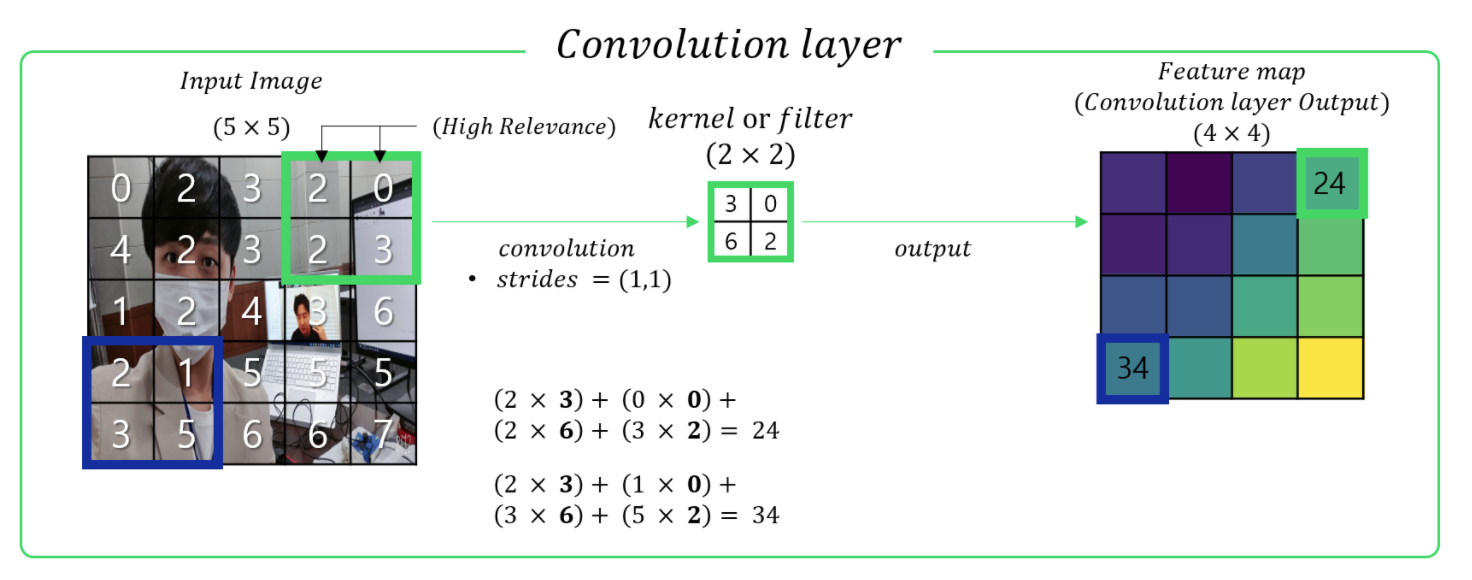

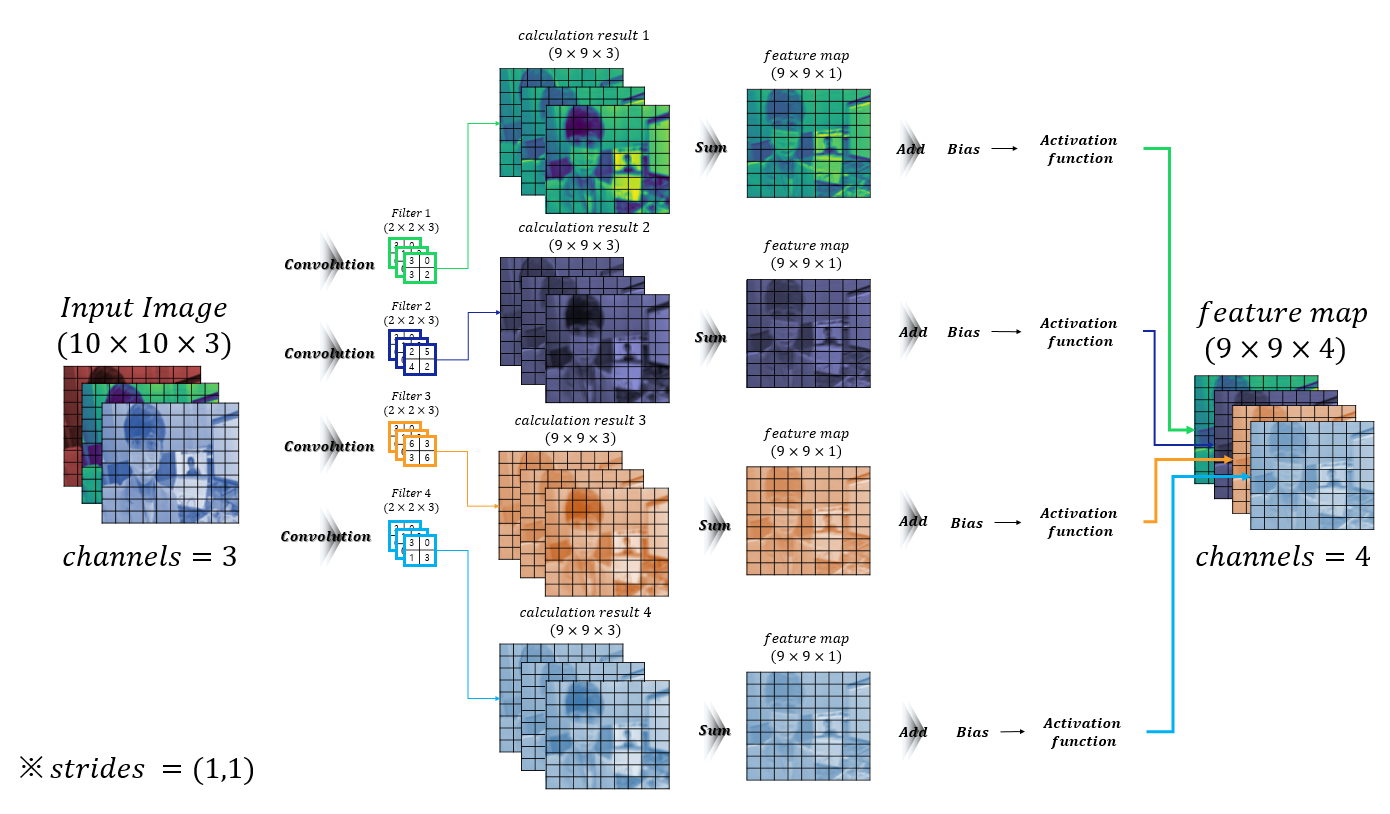

In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model

In [ ]:
model_1 = tf.keras.models.load_model('/content/drive/MyDrive/인공지능사관학교/딥러닝/data/flowers_model_1.h5')

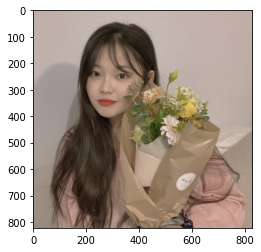

In [ ]:
image = Image.open('/content/예측 1.jpg')
plt.imshow(image)

In [ ]:
print(ins)
print(outs)
print(model_1.layers[0])

[<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'conv2d_input')>]
KerasTensor(type_spec=TensorSpec(shape=(None, 98, 98, 32), dtype=tf.float32, name=None), name='conv2d/BiasAdd:0', description="created by layer 'conv2d'")


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 56448)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7

In [ ]:
#합성곱 신경망 에 어떻게 바뀌는지 볼려고한다
ins = model_1.inputs
outs = model_1.layers[0].output #출력 계층을 layer 에서 지정해 줘서


feature_map = Model(inputs = ins,outputs = outs) #새로운 모델을 만들기 위해서는  Model 객체를 불러온다
feature_map.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#예측 을 할려면 이미지 resize 가 필요함
img_resize = image.resize([100,100]) #이미 3차원이기 때문에 맨 앞에 데이터의 수만 필요하다 
input_img= np.expand_dims(img_resize,axis = 0) #차원수 증가 함수
print(input_img.shape)

(1, 100, 100, 3)


In [ ]:
pred_img = feature_map.predict(input_img)

In [ ]:
pred_img.shape #32 개의 filter  = 32 개의 channel 값이 나온다. 

(1, 98, 98, 32)

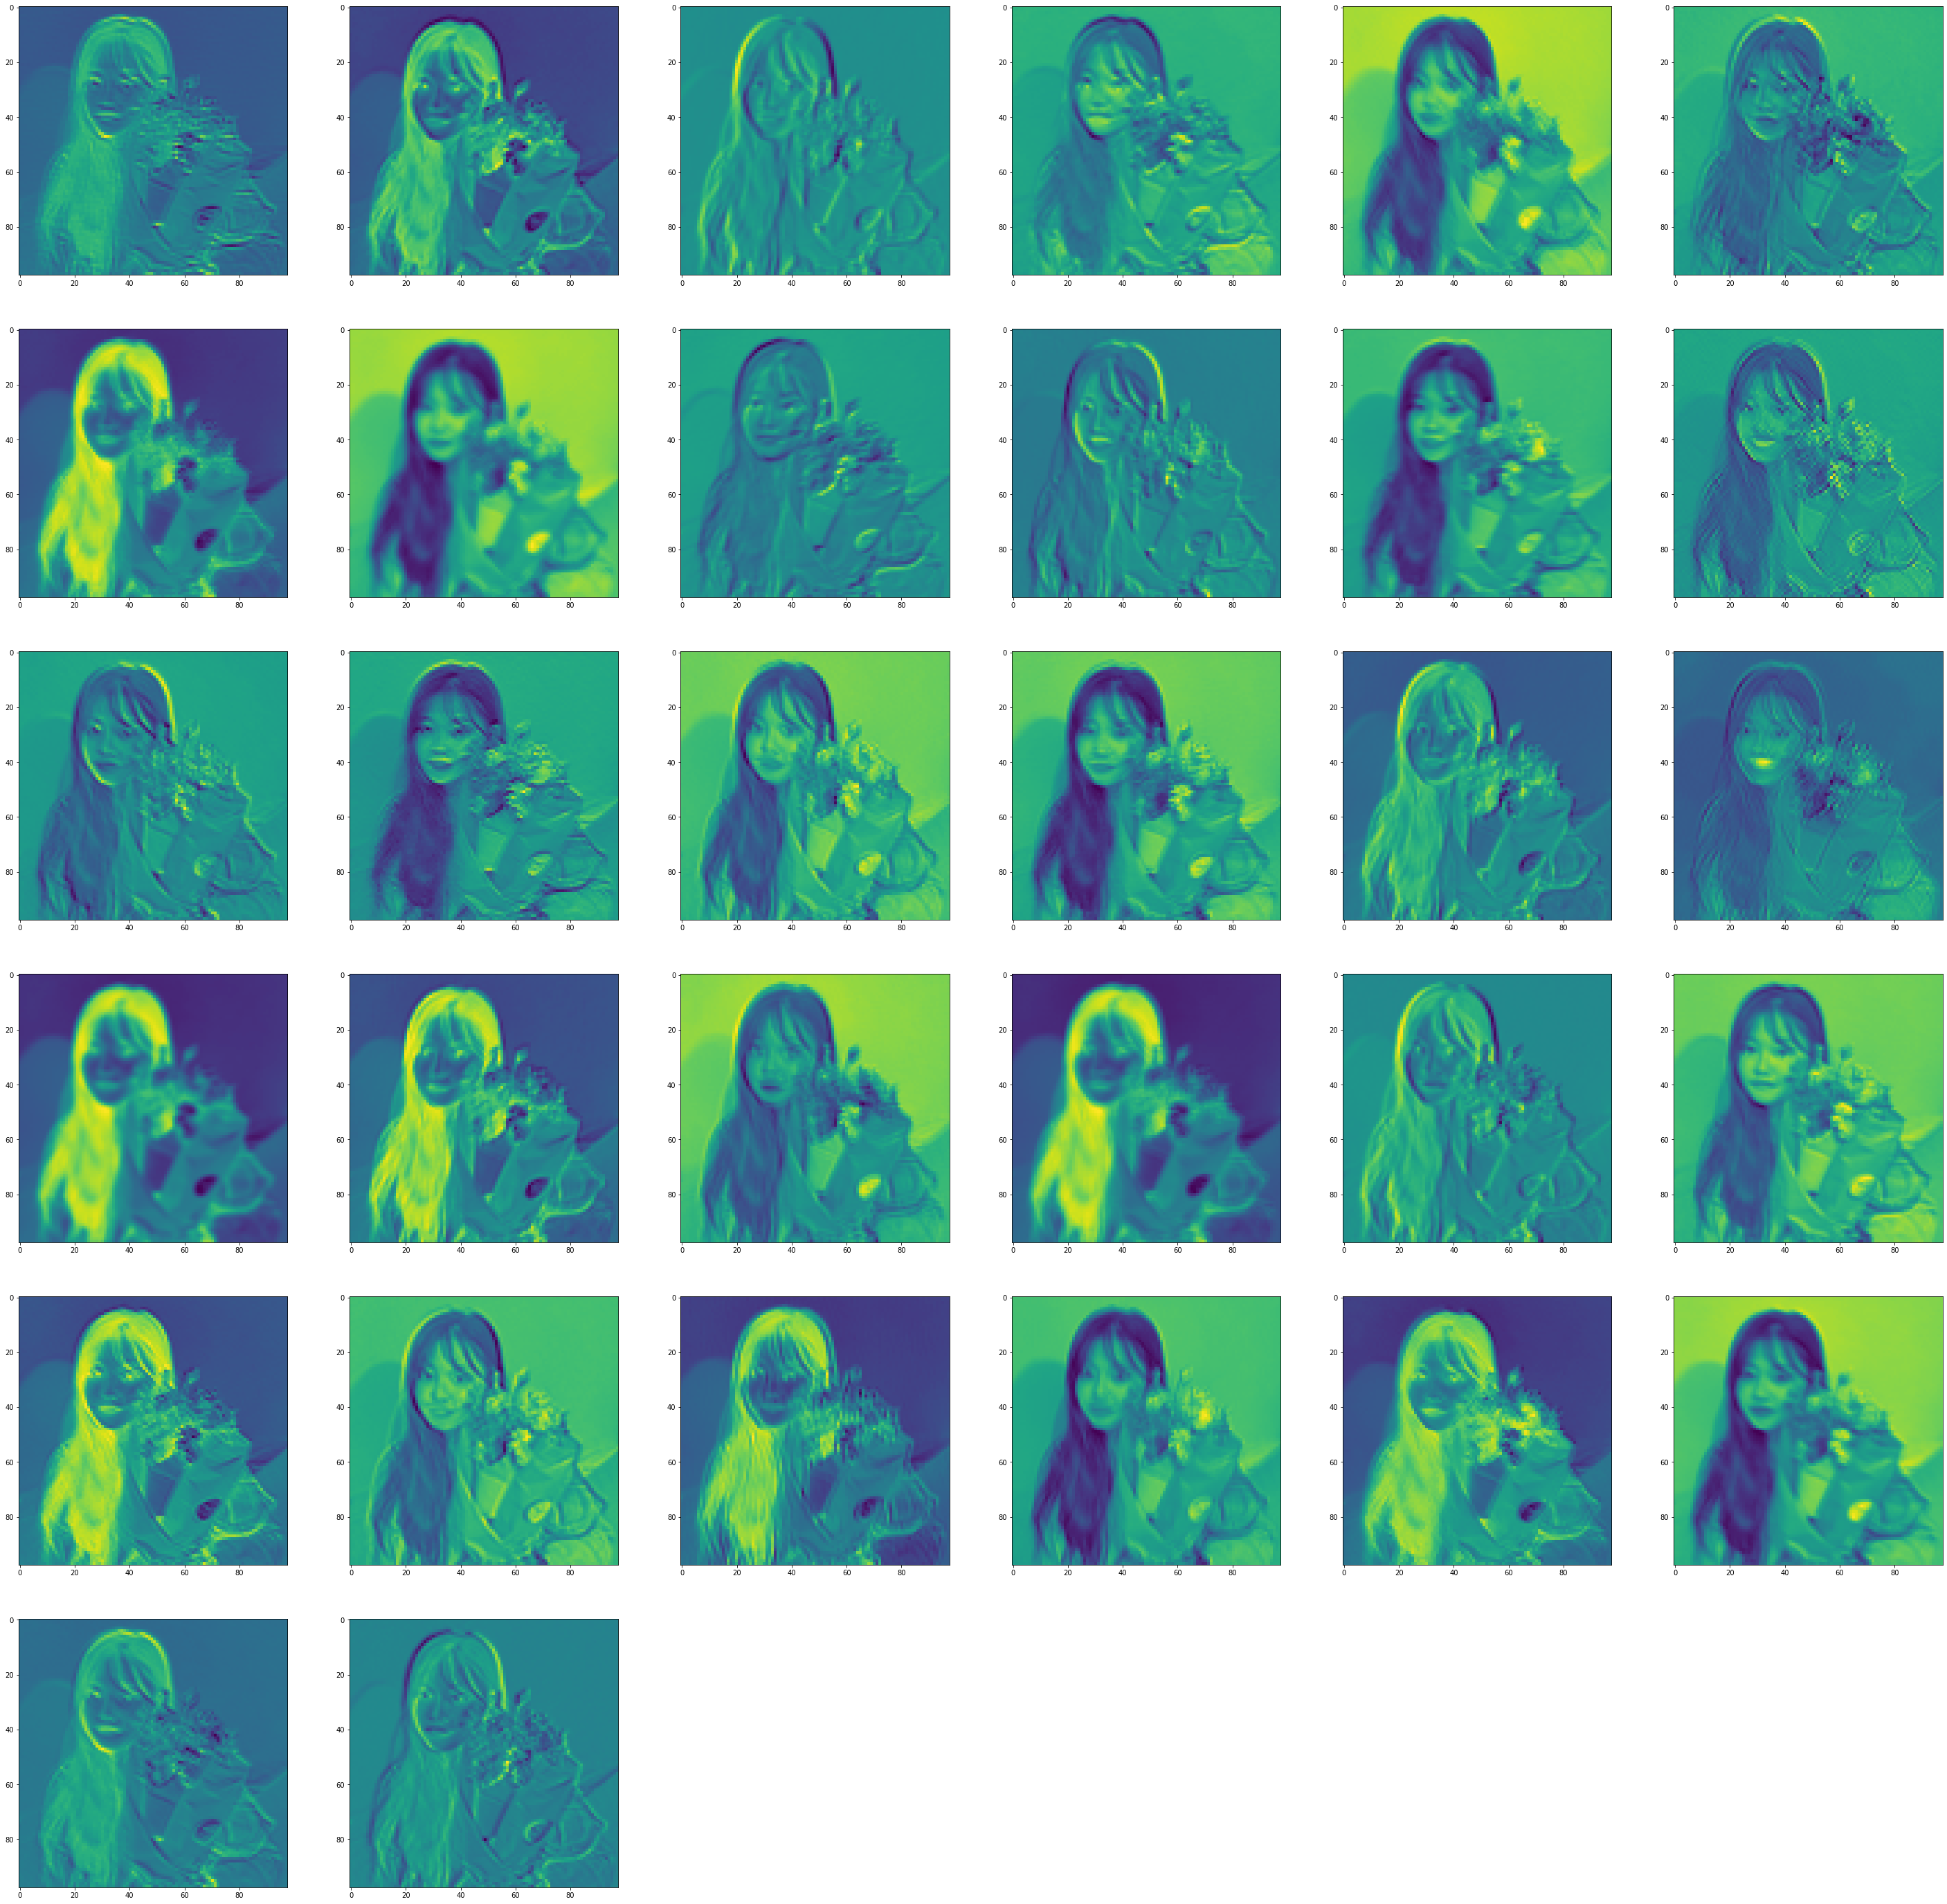

In [ ]:
fig  = plt.figure(figsize = (50,50))
for i in range(32):
  ax = fig.add_subplot(6,6,i+1)
  ax.imshow(pred_img[0,:,:,i])

##polling layer 
똑같은 색깔은 
이미지는 인접한 픽셀들 사이는 유사성(상관계수) 가 높다 
그거를 전부다 가져가는 것은 문제가 있다. 

-> 이것을 대표값을 뽑아서 이미지를 압축 시키자 
(Down sampling)  = 이것은 가장 큰 값 이거나 평균 pool size 가 될것이다. 

- pool size = (a,b) 이미지의 유사도가 최대한 유지 되도록
각 이동간격에 대표 값 산출하는 방식 

maxpooling 은 순전파 당시에 가장 대표값 큰값은 역전파를 할시 해당 위치에 만 오차의 값을 전달하고 나머지 값은 0 값이 없는걸로 초기화 

average pooling 
순전파를 할시에는 평균은 해당구역의 픽셀의 평균값 이 대표값인데 
역전파를 할시에는 대표값에 대한 오차에 대한 전파를 수행한다 높은 픽셀값이 높은 영역으로 이동한다. 

In [ ]:
#합성곱 신경망 에 어떻게 바뀌는지 볼려고한다
ins = model_1.inputs
outs = model_1.layers[1].output #출력 계층을 layer 에서 지정해 줘서


feature_map = Model(inputs = ins,outputs = outs) #새로운 모델을 만들기 위해서는  Model 객체를 불러온다
feature_map.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred_img = feature_map.predict(input_img)

In [ ]:
pred_img.shape 

(1, 49, 49, 32)

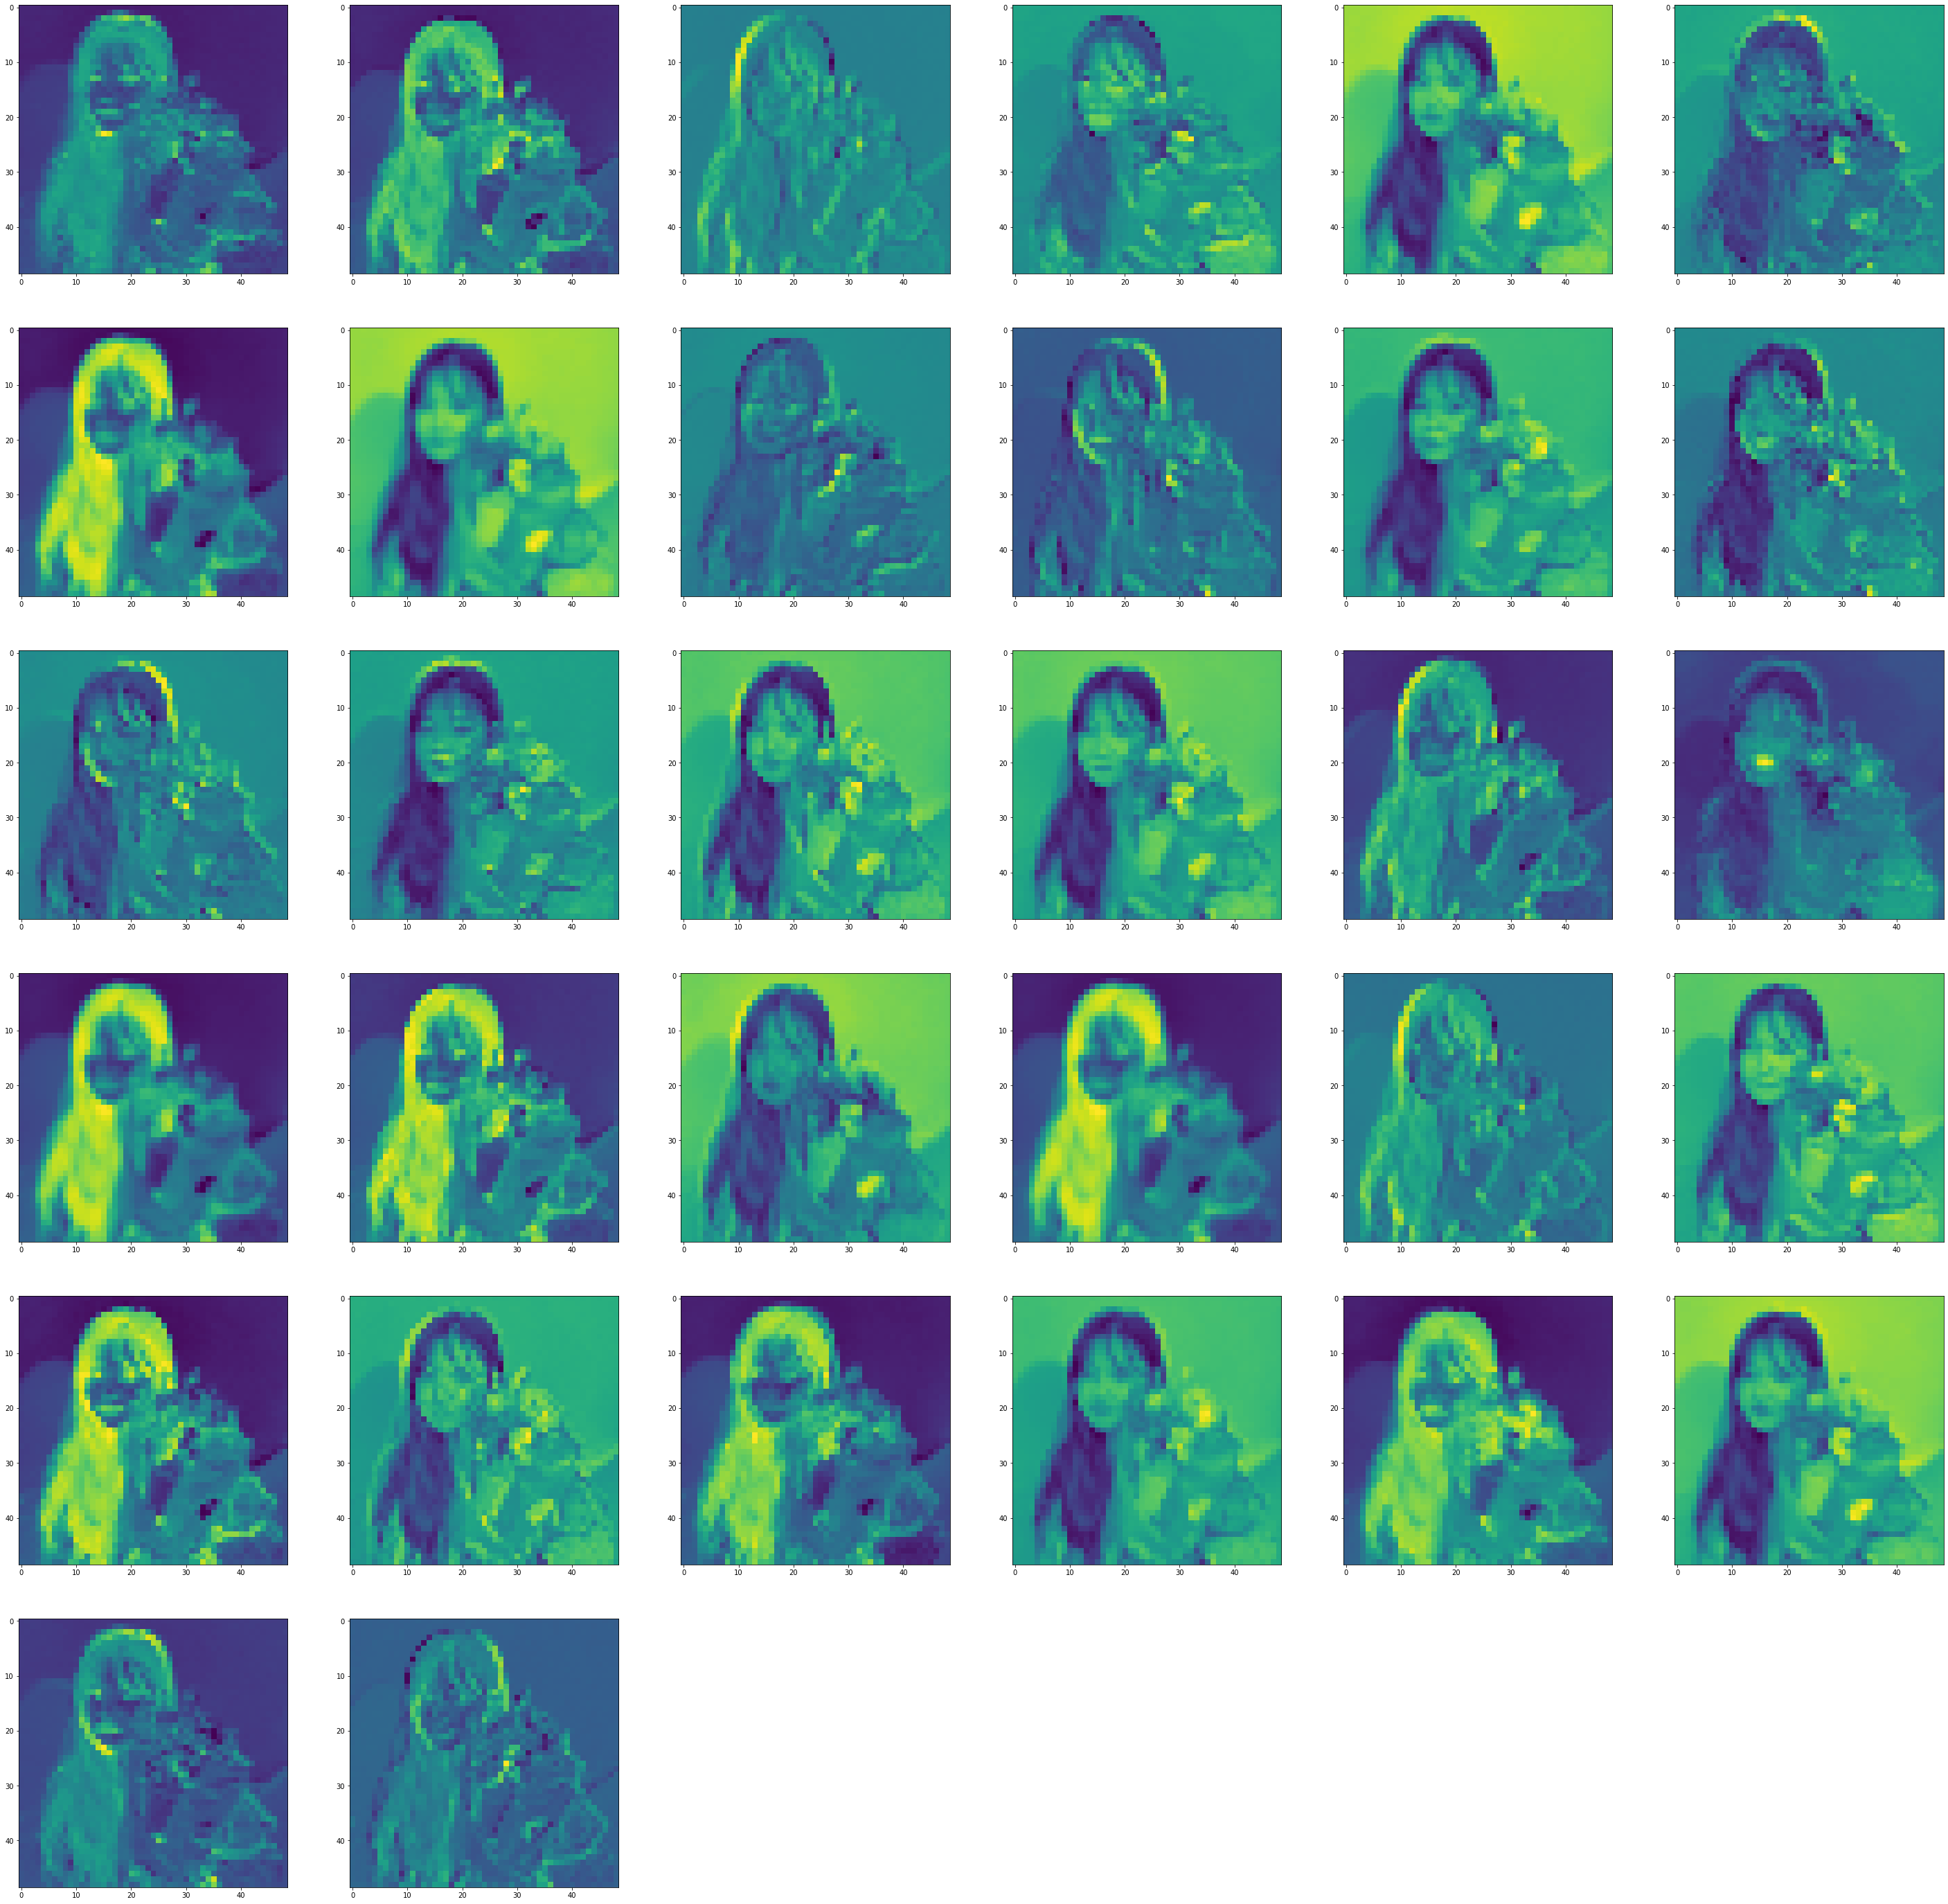

In [ ]:
#maxpooling 을 통과 했을때 
fig  = plt.figure(figsize = (50,50))
for i in range(32):
  ax = fig.add_subplot(6,6,i+1)
  ax.imshow(pred_img[0,:,:,i])

In [ ]:
#최종 합성곱
ins = model_1.inputs
outs = model_1.layers[4].output #출력 계층을 layer 에서 지정해 줘서


feature_map = Model(inputs = ins,outputs = outs) #새로운 모델을 만들기 위해서는  Model 객체를 불러온다
feature_map.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_______________________________________________________

In [ ]:
pred_img = feature_map.predict(input_img)

In [ ]:
pred_img.shape 

(1, 21, 21, 128)

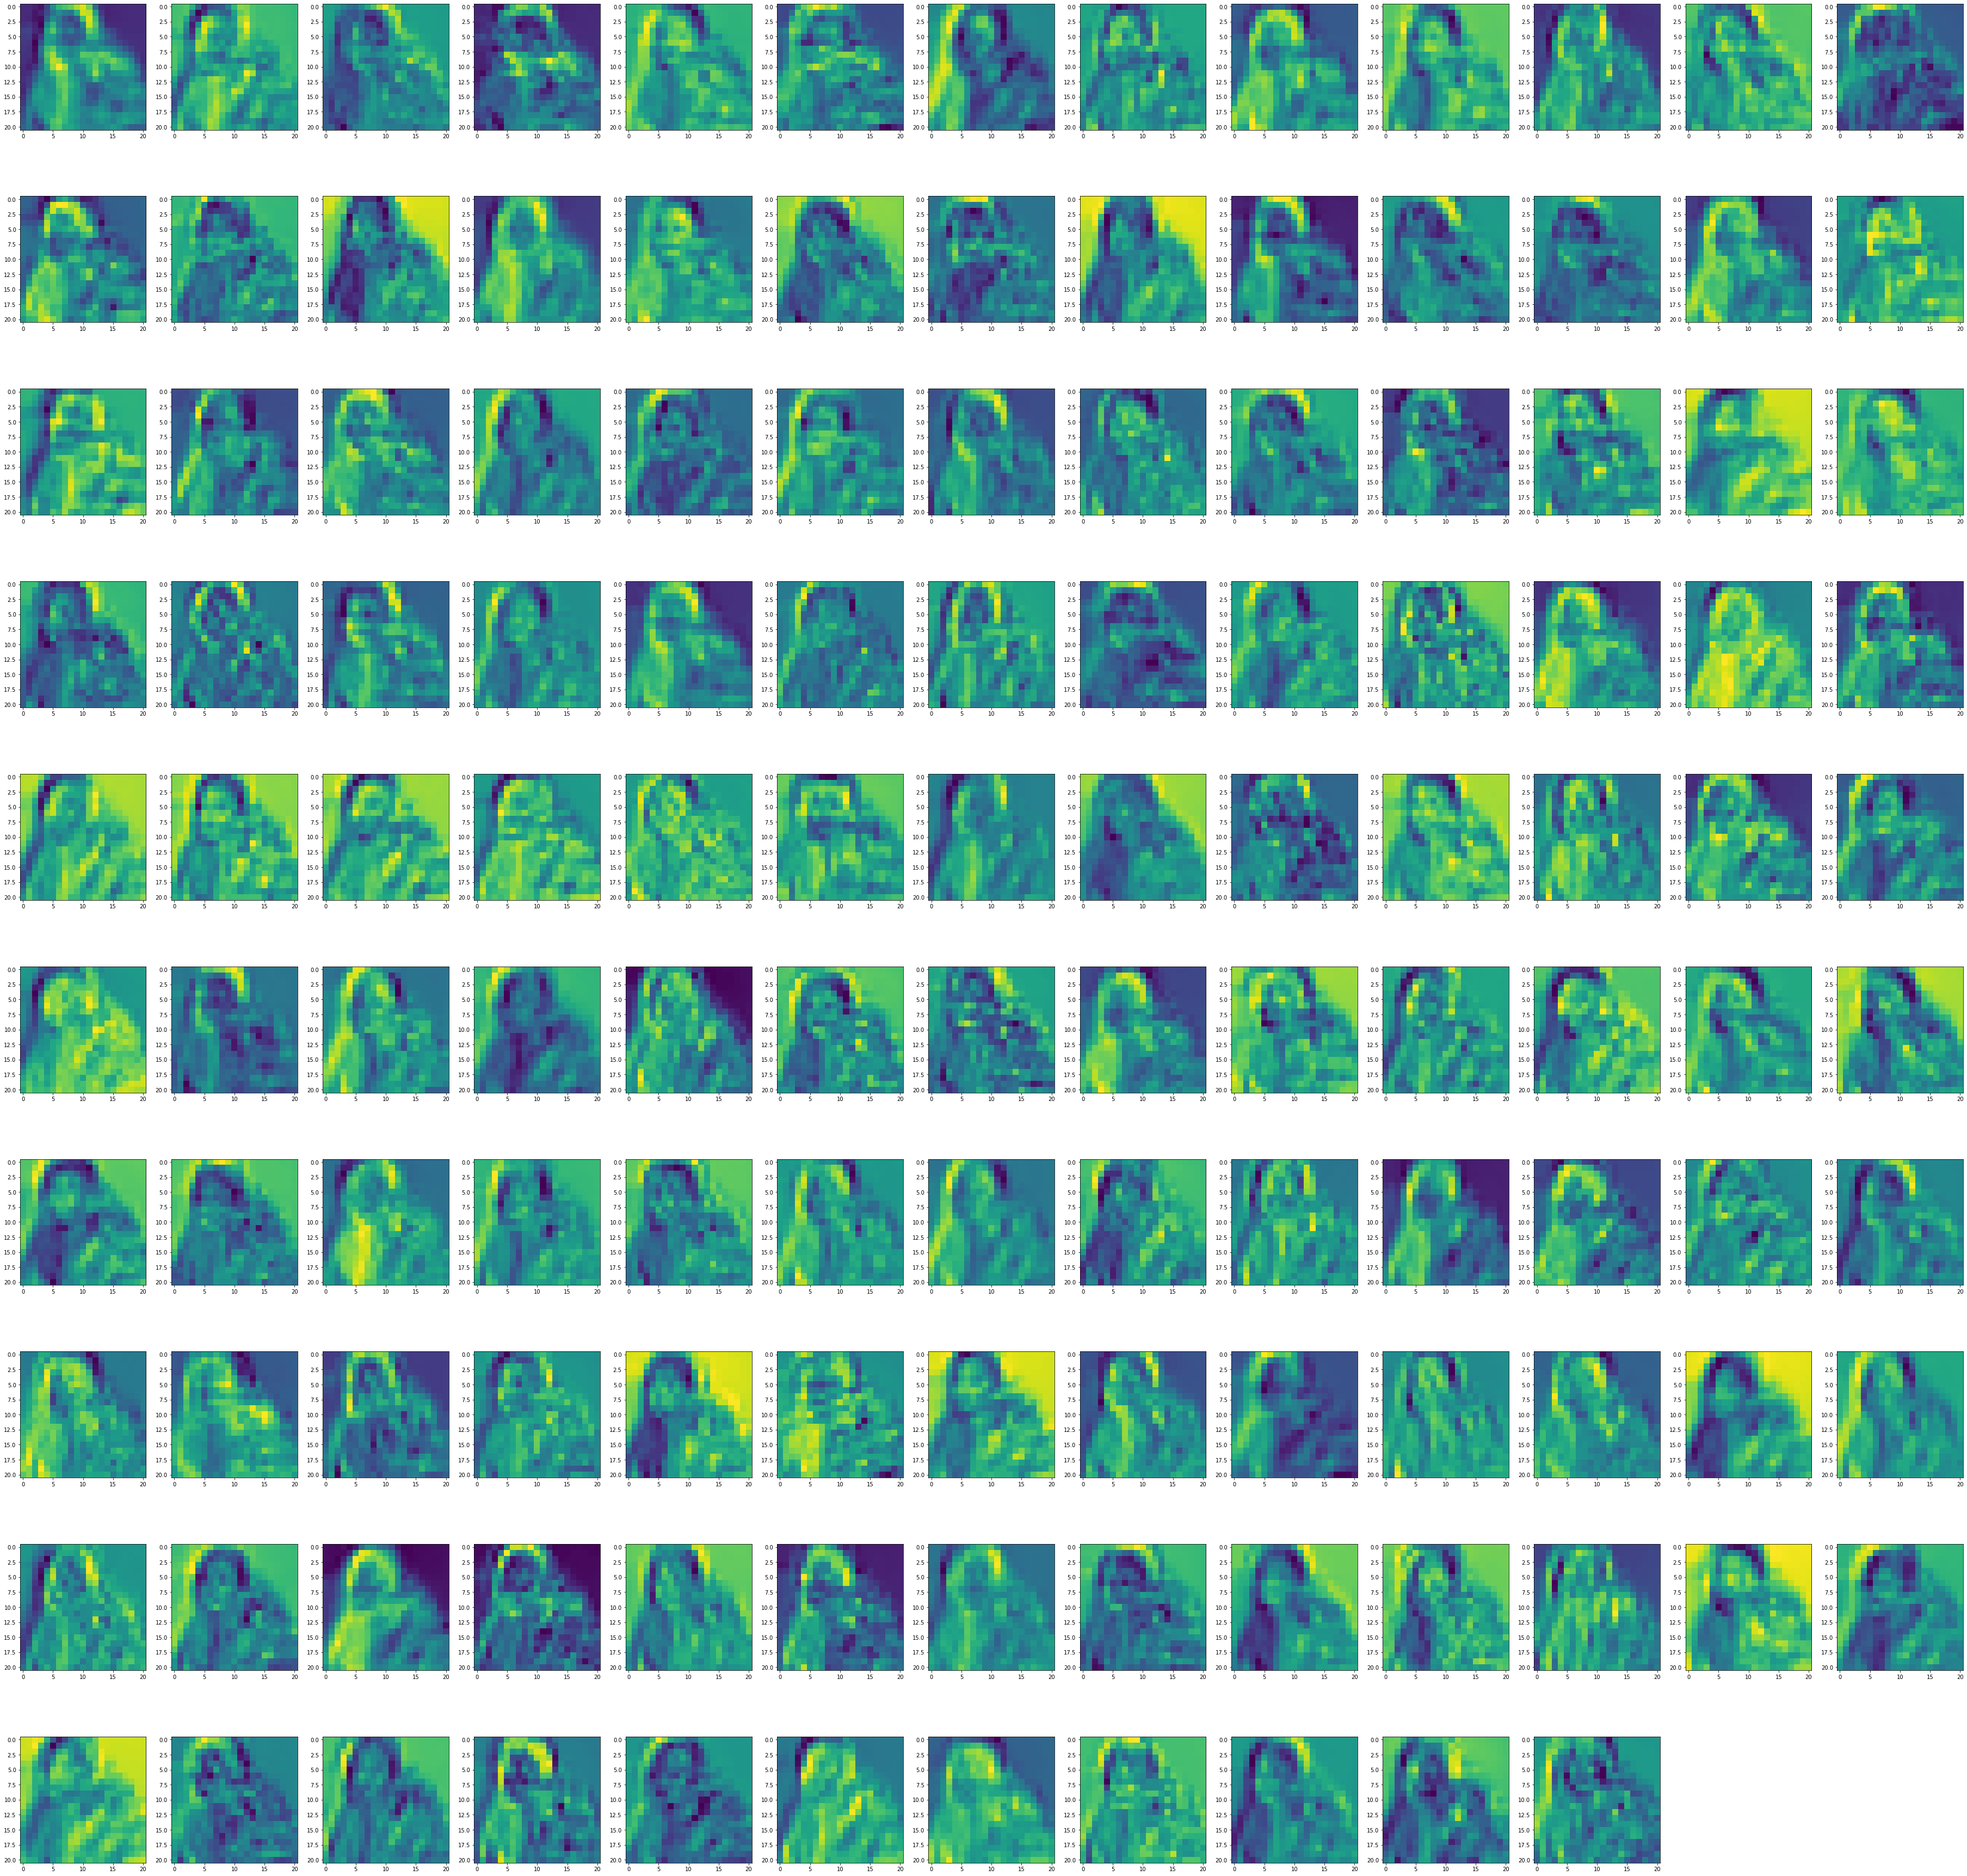

In [ ]:
#마지막 합성곱 을 통과 했을때 
fig  = plt.figure(figsize = (64,64))
for i in range(128):
  ax = fig.add_subplot(10,13,i+1)
  ax.imshow(pred_img[0,:,:,i])

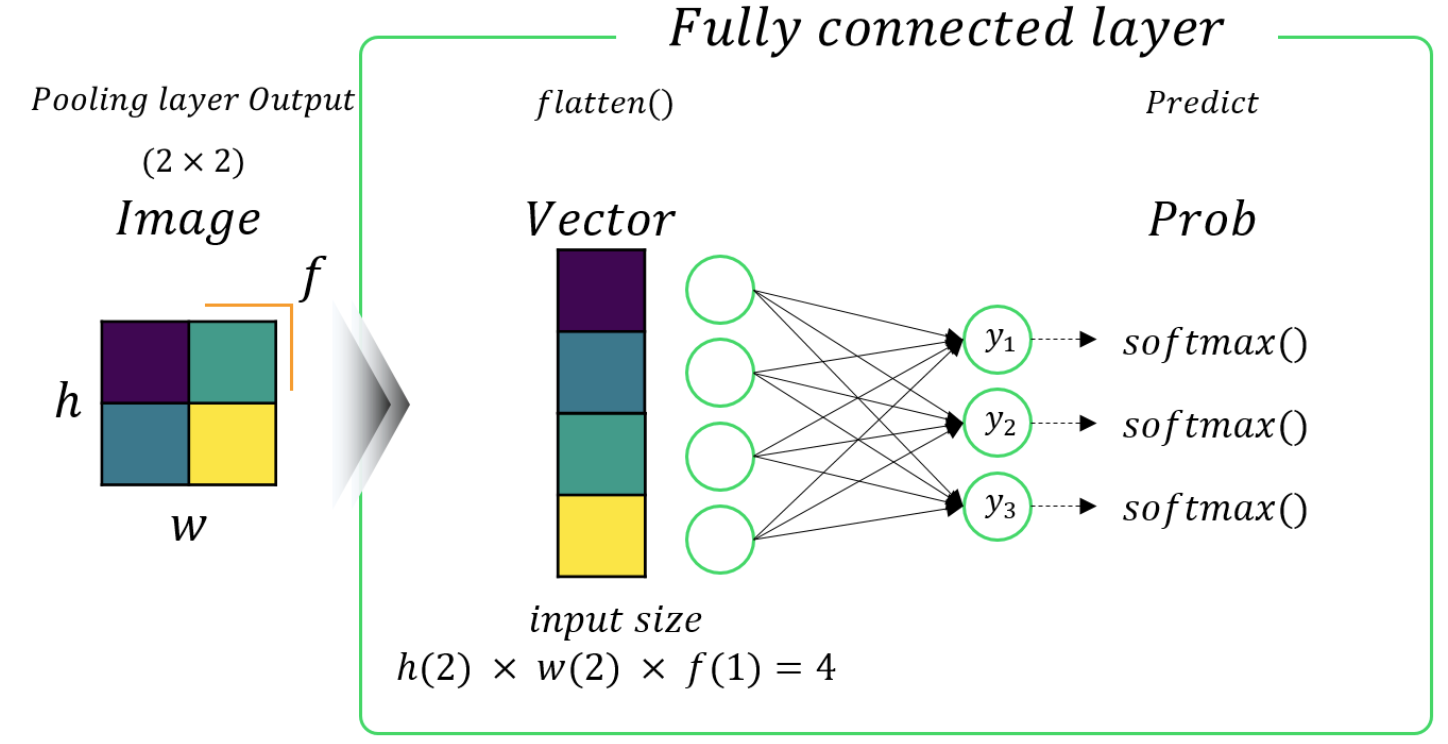

분류를 하기위해서는 2차원 데이터 로는 넣을수 없으니까 input size 를 1차원으로 바꿔 준다 


In [ ]:
h = 21 
w = 21
f = 128
print(h*w*f) #56448 개의 flatten 1차원으로 바꿔준 값이다 

56448


padding 을 주고 싶으면  = same 을 넣어라 

padding 을 쓰는 이유 가장 자리 데이터 의 손실 가장 자리 데이터는 합성곱을 수행하면서 한번 밖에 연산을 안한다 . 
그러나  padding 을 주면 연산을 한번 이상 많이 수행 할수 있다. 
+ 이미지의 연산의 크기를 유지 시킬수 있다. 


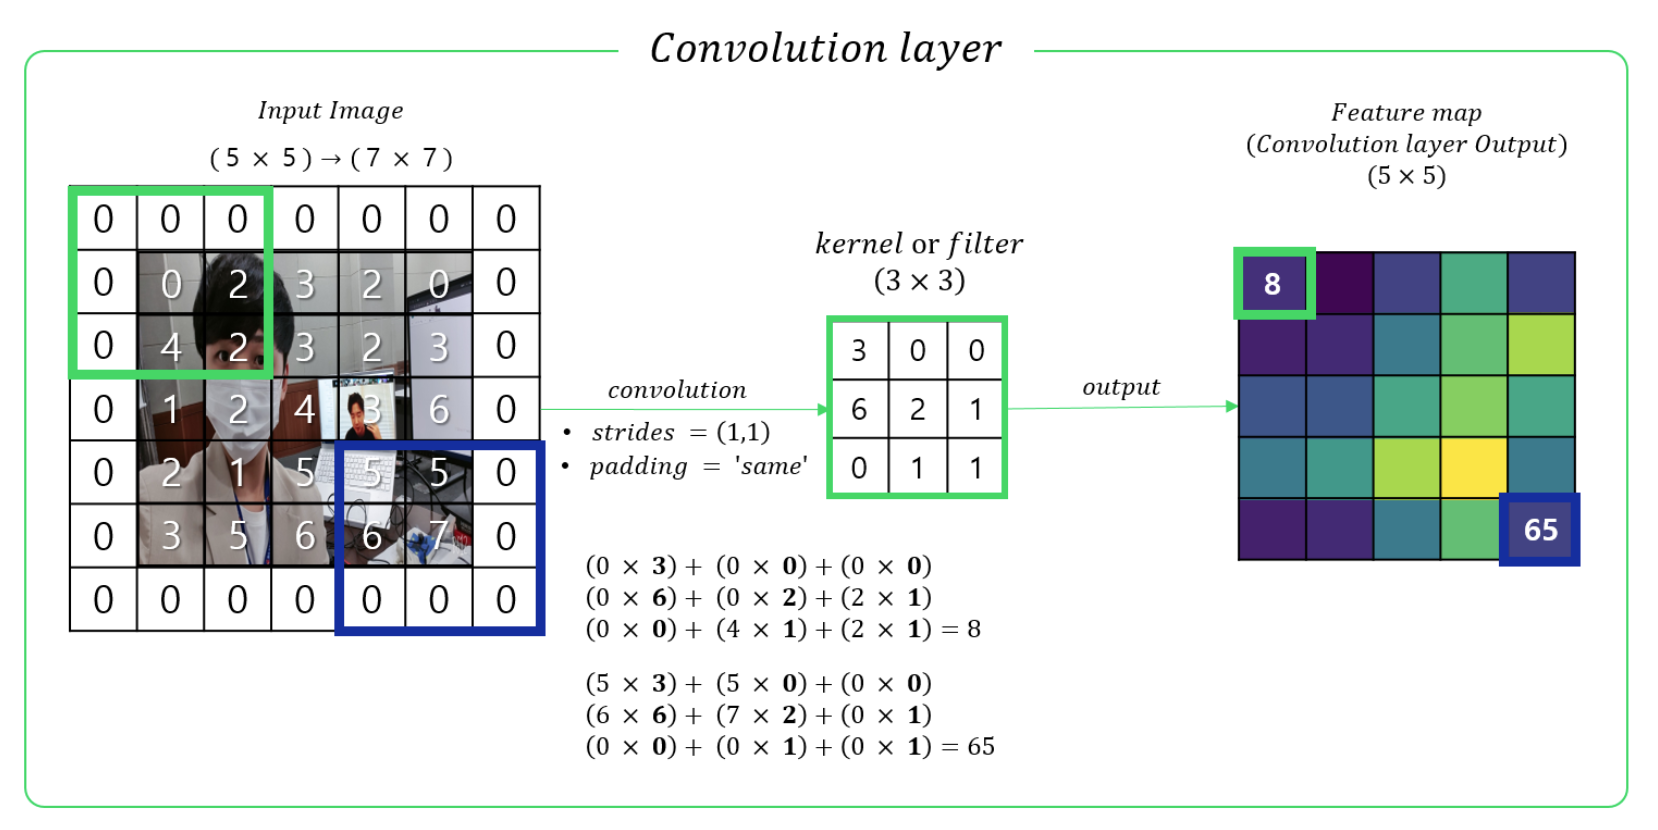